In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import itertools
import seaborn as sns
sns.set_theme()
sns.set(font_scale=13) 

%matplotlib inline

## covariance graph

In [2]:
output_result_path = './cosmo_results/'

In [3]:
salt2_fit = pd.read_csv('./cosmo_results/fit_salt2.dat',
                       sep='\s+',
                       names = ['name', 'redshift', 't0', 't0_err', 'x0', 'x0_err', 'x1', 'x1_err', 'c', 'c_err', 'mwebv', 'cov_x0x1', 'cov_x0c', 'cov_x1c', 'chiquad/dof', 'model'])
salt2_fit.head()

,name,redshift,t0,t0_err,x0,x0_err,x1,x1_err,c,c_err,mwebv,cov_x0x1,cov_x0c,cov_x1c,chiquad/dof,model
0,03D1au,0.5043,52909.7,0.184387,0.000011,8.286350e-08,1.292900,0.134236,-0.020352,0.012490,0.0296,-6.719740e-09,-2.978810e-10,-0.000203,1.02367,salt2
1,03D1aw,0.5820,52898.4,1.978770,0.000007,1.725990e-07,2.224940,0.707499,-0.007330,0.025483,0.0252,6.354680e-08,-8.085340e-10,0.006636,1.40655,salt2
2,03D1ax,0.4960,52916.1,0.101686,0.000011,9.210410e-08,-0.840369,0.104929,-0.030900,0.013322,0.0264,-5.879210e-09,-4.059190e-10,-0.000103,2.01389,salt2
3,03D1bp,0.3470,52920.3,0.103574,0.000019,2.085140e-07,-1.000660,0.114909,-0.006048,0.008554,0.0236,-1.869040e-08,-1.293780e-09,0.000409,3.73040,salt2
4,03D1co,0.6790,52954.4,0.451643,0.000004,1.590080e-07,0.769722,0.522152,-0.033253,0.042096,0.0299,-7.236470e-08,-1.714290e-09,0.008467,1.37515,salt2


In [4]:
exp3_fit_nocov = pd.read_csv('./cosmo_results/matern_fit_exp3_nocov.dat',
                        sep='\s+',
                        names = ['name', 'redshift', 't0', 't0_err', 'x0', 'x0_err', 'x1', 'x1_err', 'x2', 'x2_err', 'mwebv', 'cov_x0x1', 'cov_x0x2', 'cov_x1x2', 'chiquad/dof', 'model'])
exp3_fit_nocov.head()

,name,redshift,t0,t0_err,x0,x0_err,x1,x1_err,x2,x2_err,mwebv,cov_x0x1,cov_x0x2,cov_x1x2,chiquad/dof,model
0,03D1au,0.5043,52910.6,2.470730e-01,0.000030,6.132440e-07,0.254633,0.087649,-0.496415,0.116260,0.0296,5.039030e-08,6.830020e-08,0.009411,1.45727,exp3
1,03D1aw,0.5820,52899.3,6.017220e-09,0.000013,2.566260e-06,-1.097120,1.047310,-2.507690,1.601010,0.0252,2.676560e-06,4.095260e-06,1.667330,8.93582,exp3
2,03D1ax,0.4960,52916.5,3.381900e-05,0.000024,5.134450e-07,-0.911936,0.117513,-0.486852,0.134829,0.0264,5.082640e-08,6.352980e-08,0.010819,11.36370,exp3
3,03D1bp,0.3470,52919.3,6.073800e-05,0.000047,4.344940e-07,0.205477,0.050134,0.400482,0.064642,0.0236,1.561450e-08,2.265380e-08,0.001901,44.11520,exp3
4,03D1co,0.6790,52950.9,3.881430e-04,0.000010,8.350480e-07,0.541752,0.341222,-0.390626,0.484815,0.0299,2.674550e-07,3.902590e-07,0.159379,7.01169,exp3


In [5]:
exp3_fit_nocov = exp3_fit_nocov[exp3_fit_nocov['chiquad/dof']<5.]
exp3_fit_nocov = exp3_fit_nocov[np.abs(exp3_fit_nocov['x1'])<3.]
exp3_fit_nocov = exp3_fit_nocov[np.abs(exp3_fit_nocov['x2'])<3.]


salt2_fit = salt2_fit[salt2_fit['chiquad/dof']<5.]
salt2_fit = salt2_fit[np.abs(salt2_fit['x1'])<3.]
salt2_fit = salt2_fit[np.abs(salt2_fit['c'])<3.]

In [6]:
commom_sns = list(set(exp3_fit_nocov['name']).intersection(salt2_fit['name']))

In [7]:
covariance_graph_dictionary = {'mag_x0_salt2':[], 'mag_x0_exp3':[],
                               'x1_salt2':[], 'x1_exp3':[],
                               'x2_salt2':[], 'x2_exp3':[]}

In [8]:
marker = itertools.cycle(('.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d'))

In [9]:
for i in range(0, len(commom_sns)):
    salt2_sn_data = salt2_fit[salt2_fit['name']==commom_sns[i]]
    exp3_sn_data = exp3_fit_nocov[exp3_fit_nocov['name']==commom_sns[i]]

    covariance_graph_dictionary['mag_x0_salt2'].append(float(2.5*np.log10(salt2_sn_data['x0'])))
    covariance_graph_dictionary['mag_x0_exp3'].append(float(2.5*np.log10(exp3_sn_data['x0'])))
    
    covariance_graph_dictionary['x1_salt2'].append(float(salt2_sn_data['x1']))
    covariance_graph_dictionary['x1_exp3'].append(float(exp3_sn_data['x1']))

    covariance_graph_dictionary['x2_salt2'].append(float(salt2_sn_data['c']))
    covariance_graph_dictionary['x2_exp3'].append(float(exp3_sn_data['x2']))

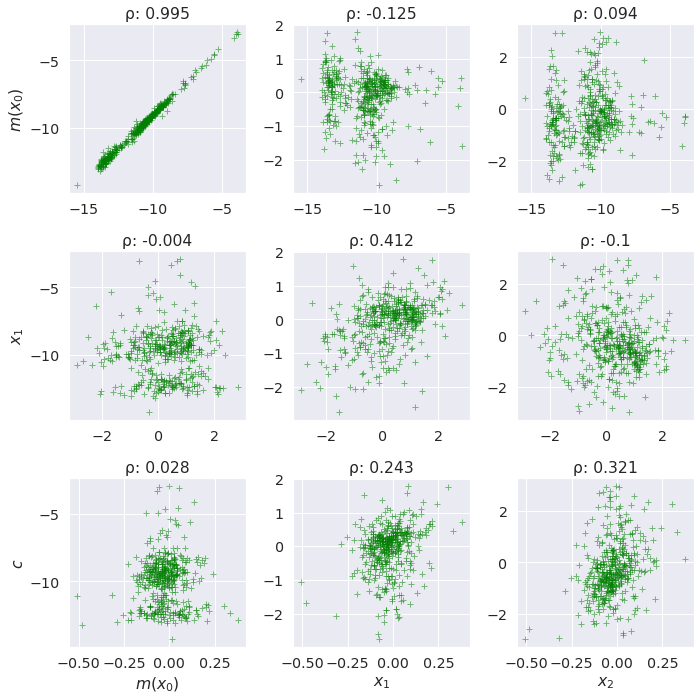

In [15]:
variables = ['mag_x0', 'x1', 'x2']
latex_variables_exp = ['$m(x_0)$', '$x_1$', '$x_2$']
latex_variables_salt2 = ['$m(x_0)$', '$x_1$', '$c$']

sns.set(font_scale=1.3) 
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(0, len(ax)):
    for j in range(0, len(ax[0])):
        pearsoncoeff = str(round(pearsonr(np.array(covariance_graph_dictionary[variables[i]+'_salt2']), np.array(covariance_graph_dictionary[variables[j]+'_exp3']))[0], 3))
        ax[i][j].plot(covariance_graph_dictionary[variables[i]+'_salt2'], covariance_graph_dictionary[variables[j]+'_exp3'], '+', c='green', alpha=.5)
        ax[i][j].set_title('ρ: '+pearsoncoeff)
        
        if j==0:
            ax[i][j].set_ylabel(latex_variables_salt2[i])
        if i==2:
            ax[i][j].set_xlabel(latex_variables_exp[j])
        
fig.tight_layout()
fig.savefig('./images/pearsoncoeffs.png', dpi=300)